In [1]:
import numpy as np
import pandas as pd
import pickle
import itertools

# System
import os, fnmatch

# Visualization
import seaborn #visualization library, must be imported before all other plotting libraries
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC, SVC
from sklearn.externals import joblib
from sklearn.metrics import plot_confusion_matrix


# Audio
import librosa.display, librosa

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data = pd.read_csv('train.csv')
data.shape

(7352, 563)

In [3]:
data1 = pd.read_csv('test.csv')
data1.shape

(2947, 563)

In [4]:
data = np.vstack((data,data1))
data.shape

(10299, 563)

In [5]:
data = pd.DataFrame(data)
#data.columns = data.columns.str.strip()

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562
0,0.288585,-0.0202942,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.94322,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.35991,-0.0585264,0.256892,-0.224848,0.264106,-0.0952456,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.66079,...,-1,-0.936508,0.346989,-0.51608,-0.80276,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.99924,-0.992656,-0.701291,-1,-0.128989,0.586156,0.374605,-0.99199,-0.990697,-0.989941,-0.992448,-0.991048,-0.99199,-0.999937,-0.990458,-0.871306,-1,-0.074323,-0.298676,-0.710304,-0.112754,0.0304004,-0.464761,-0.0184459,-0.841247,0.179941,-0.0586269,1,STANDING
1,0.278419,-0.0164106,-0.12352,-0.998245,-0.9753,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.98193,-0.999991,-0.999788,-0.998405,-0.99915,-0.977866,-0.948225,-0.714892,-0.50093,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.0909625,0.29431,-0.281211,0.0859884,-0.0221527,-0.0166565,-0.220643,-0.0134287,-0.0726919,0.579382,...,-1,-0.84127,0.532061,-0.624871,-0.90016,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.33631,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.99444,-0.995854,-0.999981,-0.994544,-1,-1,0.158075,-0.595051,-0.861499,0.053477,-0.00743457,-0.732626,0.703511,-0.844788,0.180289,-0.0543167,1,STANDING
2,0.279653,-0.0194672,-0.113462,-0.99538,-0.967187,-0.978944,-0.99652,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.99966,-0.99947,-0.99713,-0.96481,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.0863087,0.337202,-0.164739,0.0171501,-0.0745069,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.6089,...,-1,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.99464,-0.99606,-0.995866,-0.995031,-0.999973,-0.993755,-1,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.0491178,1,STANDING
3,0.279174,-0.0262006,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.98275,-0.989302,-0.938692,-0.576159,-0.829711,0.843609,0.682401,0.837869,-0.986093,-0.999976,-0.999736,-0.999504,-0.99718,-0.983799,-0.986007,-0.627446,-0.85093,-0.911872,0.0614357,0.0748396,0.198204,-0.264307,0.0725452,-0.15532,0.323154,-0.170813,0.294938,-0.306081,0.482148,-0.470129,-0.305693,-0.362654,0.507459,...,-1,1,0.678921,-0.701131,-0.909639,-0.989413,-0.987836,-0.98685,-0.986749,-0.996199,-0.989413,-0.999876,-0.989136,-0.720891,-1,-0.0356842,-0.230091,-0.511217,-0.995221,-0.995237,-0.995722,-0.995273,-0.995732,-0.995221,-0.999974,-0.995226,-0.955696,-0.936508,0.404573,-0.11729,-0.482845,-0.036788,-0.0128925,0.640011,-0.485366,-0.848649,0.181935,-0.0476632,1,STANDING
4,0.276629,-0.0165697,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,-0.569174,-0.824705,0.849095,0.68325,0.837869,-0.992653,-0.999991,-0.999856,-0.999757,-0.998004,-0.981232,-0.991325,-0.786553,-0.559477,-0.761434,0.313276,-0.131208,0.191161,0.0869036,0.257615,-0.272505,0.434728,-0.315375,0.439744,-0.269069,0.179414,-0.088952,-0.155804,-0.189763,0.599213,...,-1,-1,0.559058,-0.528901,-0.858933,-0.991433,-0.989059,-0.987744,-0.991462,-0.998353,-0.991433,-0.999902,-0.989321,-0.763372,-0.897436,-0.273582,-0.510282,-0.830702,-0.995093,-0.995465,-0.995279,-0.995609,-0.997418,-0.995093,-0.999974,-0.995487,-1,-0.936508,0.087753,-0.351471,-0.699205,0.12332

In [6]:
data.columns

RangeIndex(start=0, stop=563, step=1)

In [7]:
data[562].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [8]:
X = data[data.columns[:-2]]
Y = data[562]
X.shape
Y.shape

(10299,)

In [9]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(X))
print("Feature vectors shape:",scaled_feature_vectors.shape)
# Encode Labels
labelencoder = LabelEncoder()
labels = Y
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
classes_num = labelencoder.transform(labels)

Feature vectors shape: (10299, 561)
6 classes: LAYING, SITTING, STANDING, WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_vectors, classes_num, test_size=0.30, random_state=42)
# Check Set Shapes
print("train_set shape:",X_train.shape)
print("test_set shape:",X_test.shape)
print("train_classes shape:",y_train.shape)
print("test_classes shape:",y_test.shape)


train_set shape: (7209, 561)
test_set shape: (3090, 561)
train_classes shape: (7209,)
test_classes shape: (3090,)


In [11]:
Y_TRAIN = np.zeros((7209,6))

In [12]:
for i in range(7209):
  Y_TRAIN[i][y_train[i]-1]=1

In [13]:
Y_TRAIN

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

#Naive Bayes#

In [27]:
#instantiate the  Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(classification_report(y_test , predicted , target_names = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']))

                    precision    recall  f1-score   support

            LAYING       0.98      0.55      0.71       597
           SITTING       0.43      0.91      0.58       563
          STANDING       0.81      0.23      0.36       547
           WALKING       0.92      0.73      0.81       539
WALKING_DOWNSTAIRS       0.78      0.77      0.78       420
  WALKING_UPSTAIRS       0.68      0.91      0.78       424

          accuracy                           0.67      3090
         macro avg       0.77      0.68      0.67      3090
      weighted avg       0.77      0.67      0.66      3090



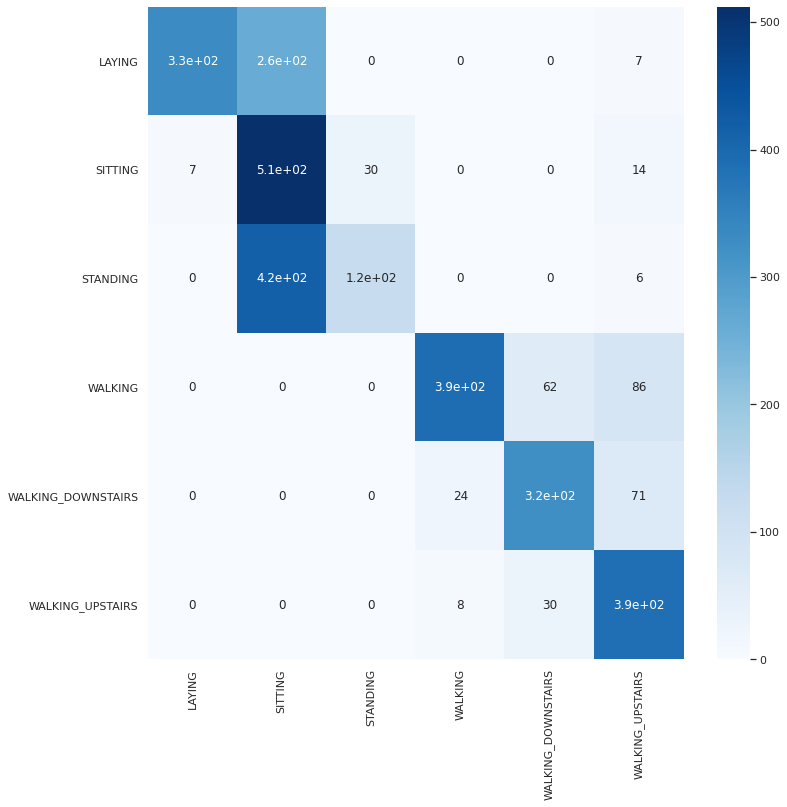

In [ ]:
classes = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, predicted)
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(cf_matrix, annot=True , cmap = 'Blues', xticklabels = classes ,yticklabels= classes  )


#Logistic Regression#


In [ ]:
#Logistic Regression 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(classification_report(y_test , predicted , target_names = classes))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       597
           SITTING       0.97      0.94      0.95       563
          STANDING       0.95      0.97      0.96       547
           WALKING       0.99      1.00      1.00       539
WALKING_DOWNSTAIRS       1.00      0.99      0.99       420
  WALKING_UPSTAIRS       0.99      1.00      0.99       424

          accuracy                           0.98      3090
         macro avg       0.98      0.98      0.98      3090
      weighted avg       0.98      0.98      0.98      3090



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


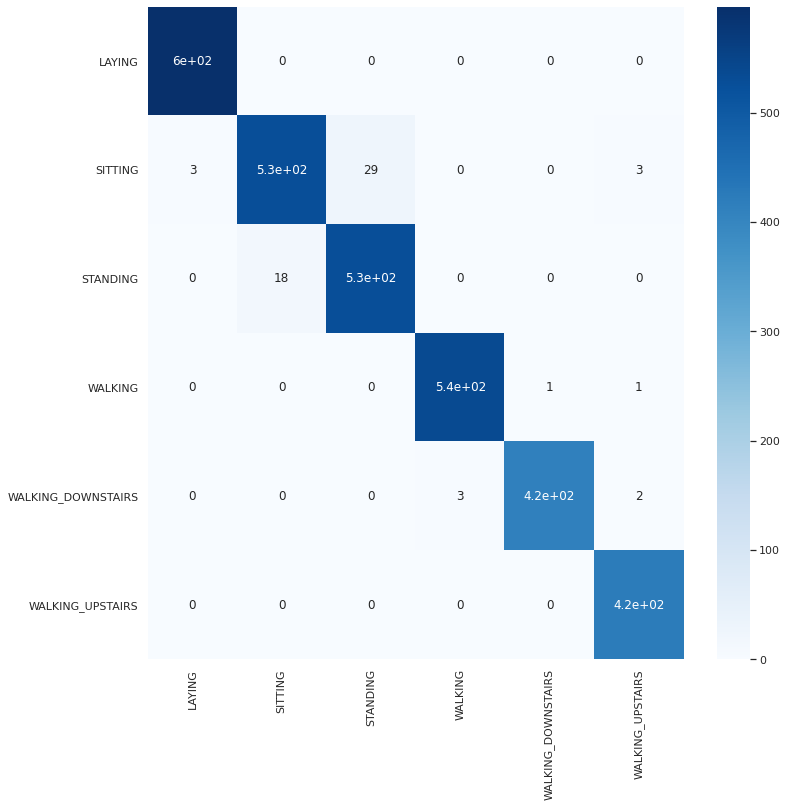

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, predicted)
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(cf_matrix, annot=True , cmap = 'Blues', xticklabels = classes ,yticklabels= classes  )


#SVM with RBF Kernel#


In [ ]:
#svm 
from sklearn.svm import SVC
from sklearn.metrics import classification_report
clf = SVC(gamma='auto' , C= 10 , kernel = 'rbf')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(classification_report(y_test , predicted , target_names = classes))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       597
           SITTING       0.97      0.96      0.96       563
          STANDING       0.97      0.97      0.97       547
           WALKING       1.00      1.00      1.00       539
WALKING_DOWNSTAIRS       0.99      1.00      1.00       420
  WALKING_UPSTAIRS       0.99      0.99      0.99       424

          accuracy                           0.98      3090
         macro avg       0.98      0.99      0.98      3090
      weighted avg       0.98      0.98      0.98      3090



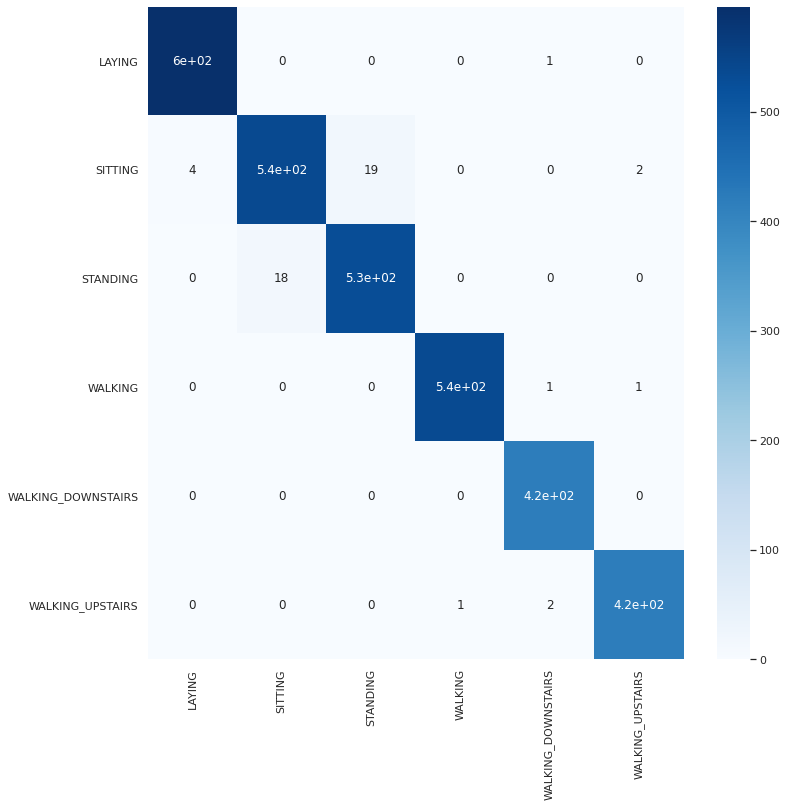

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, predicted)
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(cf_matrix, annot=True , cmap = 'Blues', xticklabels = classes ,yticklabels= classes  )

#Random forest# 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth= 20 , n_estimators = 100 , random_state=42)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(classification_report(y_test , predicted , target_names = classes))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       597
           SITTING       0.96      0.95      0.95       563
          STANDING       0.95      0.96      0.95       547
           WALKING       0.99      0.99      0.99       539
WALKING_DOWNSTAIRS       0.98      0.97      0.97       420
  WALKING_UPSTAIRS       0.97      0.98      0.98       424

          accuracy                           0.98      3090
         macro avg       0.98      0.98      0.98      3090
      weighted avg       0.98      0.98      0.98      3090



#ANN

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [15]:
#Initialising the ANN
classifier=Sequential()
X_train.shape

(7209, 561)

In [16]:
#adding the input layer and first hidden layer
classifier.add(Dense(units=280, kernel_initializer='uniform',activation='relu',input_dim=561))
classifier.add(Dropout(0.4))

In [17]:
#adding the second hidden layer
classifier.add(Dense(units=280, kernel_initializer='uniform',activation='relu'))
classifier.add(Dropout(0.3))

In [18]:
#adding the output layer
classifier.add(Dense(units=6, kernel_initializer='uniform',activation='softmax'))

In [19]:
#compiling the ANN 
classifier.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [20]:
#Fitting the ANN to Training set
classifier.fit(X_train,Y_TRAIN,batch_size=10,epochs=100)

Epoch 1/100
721/721 [==============================] - 3s 4ms/step - loss: 0.3125 - accuracy: 0.8728
Epoch 2/100
721/721 [==============================] - 3s 4ms/step - loss: 0.1607 - accuracy: 0.9406
Epoch 3/100
721/721 [==============================] - 3s 5ms/step - loss: 0.1207 - accuracy: 0.9564
Epoch 4/100
721/721 [==============================] - 3s 4ms/step - loss: 0.1322 - accuracy: 0.9546
Epoch 5/100
721/721 [==============================] - 3s 4ms/step - loss: 0.1014 - accuracy: 0.9627
Epoch 6/100
721/721 [==============================] - 3s 4ms/step - loss: 0.1088 - accuracy: 0.9614
Epoch 7/100
721/721 [==============================] - 3s 4ms/step - loss: 0.0906 - accuracy: 0.9670
Epoch 8/100
721/721 [==============================] - 3s 4ms/step - loss: 0.0953 - accuracy: 0.9659
Epoch 9/100
721/721 [==============================] - 3s 4ms/step - loss: 0.0978 - accuracy: 0.9662
Epoch 10/100
721/721 [==============================] - 3s 4ms/step - loss: 0.0939 - accura

In [21]:
y_pred=classifier.predict(X_test)

In [22]:
t = []
max = 0
y_pred = np.array(y_pred)
y_pred[9]


array([0., 0., 0., 0., 0., 1.], dtype=float32)

In [23]:
y_test[9]

0

In [24]:
for i in range(3090):
  for j in range(6):
    if y_pred[i][j]>max:
      k = j
      max = y_pred[i][j]
  k+=1
  k%=6
  t.append(k)
  max = 0
x = np.array(t)
x.shape
for i in range(1000):
  print(y_train[i])

1
1
3
5
2
5
5
1
0
0
2
1
3
2
3
5
0
3
2
1
3
5
0
1
0
4
4
0
0
4
1
0
1
1
1
2
5
3
0
0
1
5
0
4
0
1
1
2
4
1
5
3
2
0
4
2
0
1
0
3
3
0
3
0
1
0
0
3
3
2
0
3
0
4
5
0
5
2
1
0
2
3
1
2
2
5
0
0
2
1
0
1
2
0
3
0
4
0
2
1
2
1
4
0
5
1
2
2
2
5
3
1
4
2
3
5
0
3
1
4
0
2
0
4
0
2
2
5
2
1
4
5
2
3
5
1
5
2
3
1
3
0
1
3
5
2
2
3
0
2
5
2
2
1
0
3
2
3
0
3
1
1
1
0
0
4
1
1
0
2
0
5
2
5
4
0
5
2
3
2
2
2
5
3
5
3
1
2
4
4
4
5
5
3
5
1
0
4
0
3
2
4
4
4
4
3
1
5
5
4
5
0
0
2
2
3
3
1
4
5
2
5
3
2
0
1
0
0
4
2
2
2
1
5
5
4
2
3
5
3
3
3
0
5
3
3
0
5
1
2
2
1
3
3
1
0
3
3
4
1
1
3
3
2
0
0
4
4
1
1
0
2
1
3
5
0
0
2
4
2
1
1
4
5
2
0
3
2
5
0
1
3
4
4
2
3
0
0
1
1
0
5
4
4
3
3
0
1
1
5
0
0
3
4
4
3
1
0
2
0
0
0
2
2
2
4
2
0
2
1
2
1
0
1
4
4
4
4
4
1
0
5
4
0
3
3
5
2
4
1
4
0
1
0
4
5
5
3
1
2
1
0
4
4
2
0
0
3
0
4
1
2
3
1
5
4
0
5
5
4
0
4
3
2
2
5
1
3
2
1
3
0
0
2
2
2
5
3
0
4
2
3
3
2
1
3
3
1
3
4
5
3
1
0
2
3
1
4
1
4
2
0
4
2
0
4
2
0
1
2
3
4
1
0
0
2
3
2
4
0
1
2
2
1
2
0
0
1
5
2
5
0
5
1
3
0
0
4
5
0
4
2
4
0
5
4
4
0
0
2
0
3
4
3
0
0
2
3
0
3
1
0
0
1
0
2
4
1
3
0
5
3
3
5
2
5
2
4
3
2


In [25]:
count = 0
for i in range(3090):
  if y_test[i] == x[i]:
    count+=1
print(count)
accuracy = count/3090
accuracy *= 100
accuracy

3026


97.92880258899676

#Own data#

In [ ]:
data2 = pd.read_csv('combined.csv')
data2.shape

(222, 11)

In [ ]:
#data2 = pd.DataFrame(data2)

X2 = data2[data2.columns[:-1]]
X2.shape
Y2 = data2[data2.columns[10]]
Y2.shape

(222,)

In [ ]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(X2))
print("Feature vectors shape:",scaled_feature_vectors.shape)
# Encode Labels
labelencoder = LabelEncoder()
labels = Y2
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
classes_num = labelencoder.transform(labels)

Feature vectors shape: (222, 10)
6 classes: LAYING, SITTING, STANDING, WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_vectors, classes_num, test_size=0.30, random_state=42)
# Check Set Shapes
print("train_set shape:",X_train.shape)
print("test_set shape:",X_test.shape)
print("train_classes shape:",y_train.shape)
print("test_classes shape:",y_test.shape)

train_set shape: (155, 10)
test_set shape: (67, 10)
train_classes shape: (155,)
test_classes shape: (67,)


In [ ]:
#instantiate the  Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(classification_report(y_test , predicted , target_names = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00         7
           SITTING       1.00      1.00      1.00         8
          STANDING       1.00      1.00      1.00        18
           WALKING       1.00      1.00      1.00         9
WALKING_DOWNSTAIRS       0.80      0.89      0.84         9
  WALKING_UPSTAIRS       0.93      0.88      0.90        16

          accuracy                           0.96        67
         macro avg       0.96      0.96      0.96        67
      weighted avg       0.96      0.96      0.96        67



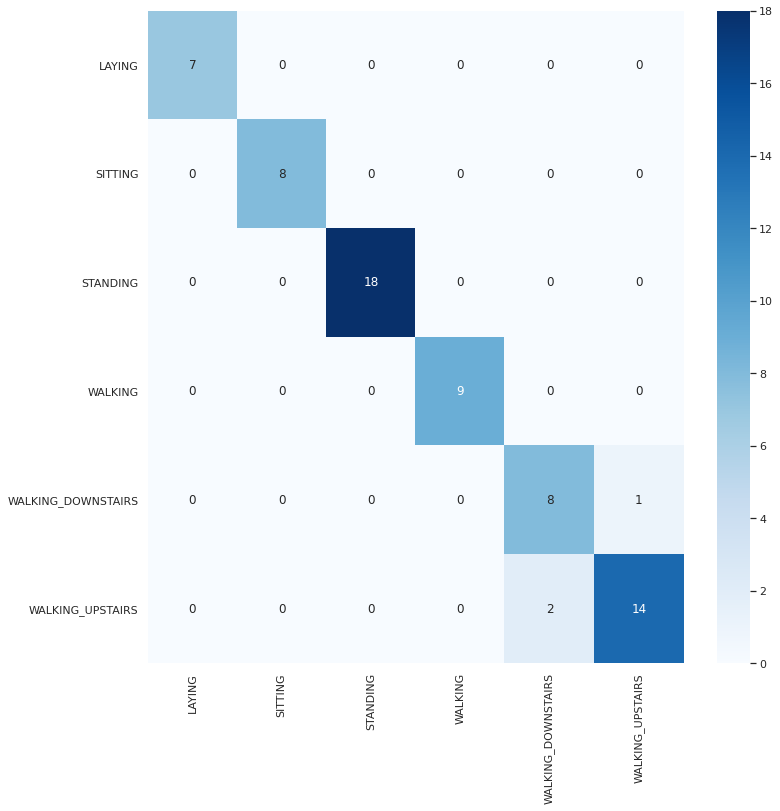

In [ ]:
classes = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, predicted)
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(cf_matrix, annot=True , cmap = 'Blues', xticklabels = classes ,yticklabels= classes  )


In [ ]:
#Logistic Regression 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(classification_report(y_test , predicted , target_names = classes))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00         7
           SITTING       1.00      1.00      1.00         8
          STANDING       0.90      1.00      0.95        18
           WALKING       1.00      1.00      1.00         9
WALKING_DOWNSTAIRS       1.00      0.89      0.94         9
  WALKING_UPSTAIRS       1.00      0.94      0.97        16

          accuracy                           0.97        67
         macro avg       0.98      0.97      0.98        67
      weighted avg       0.97      0.97      0.97        67



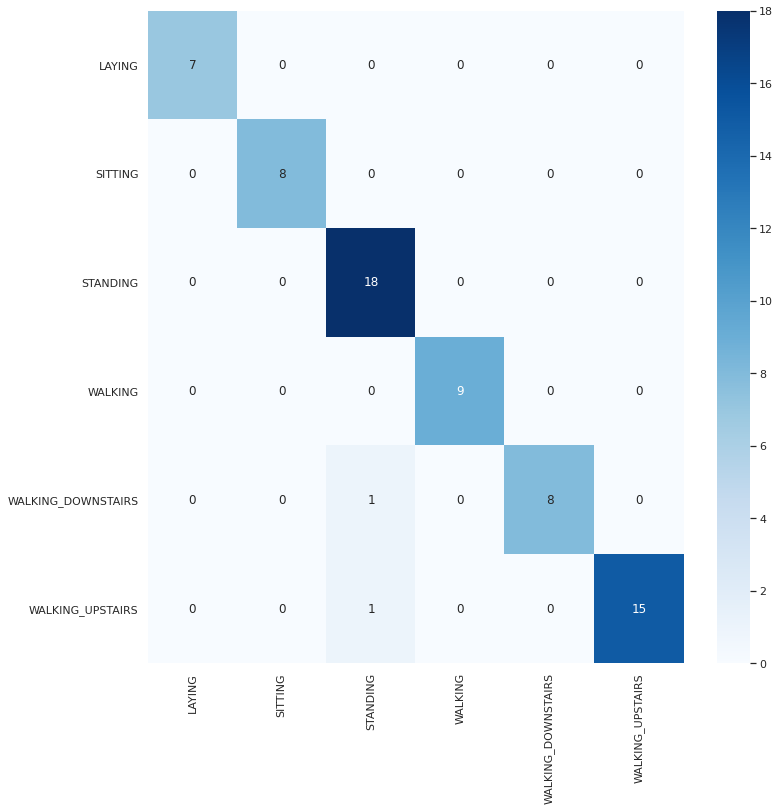

In [ ]:
classes = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, predicted)
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(cf_matrix, annot=True , cmap = 'Blues', xticklabels = classes ,yticklabels= classes  )


In [ ]:
#svm 
from sklearn.svm import SVC
from sklearn.metrics import classification_report
clf = SVC(gamma='auto' , C= 10 , kernel = 'rbf')
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(classification_report(y_test , predicted , target_names = classes))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00         7
           SITTING       1.00      1.00      1.00         8
          STANDING       1.00      1.00      1.00        18
           WALKING       1.00      1.00      1.00         9
WALKING_DOWNSTAIRS       1.00      0.89      0.94         9
  WALKING_UPSTAIRS       0.94      1.00      0.97        16

          accuracy                           0.99        67
         macro avg       0.99      0.98      0.99        67
      weighted avg       0.99      0.99      0.98        67



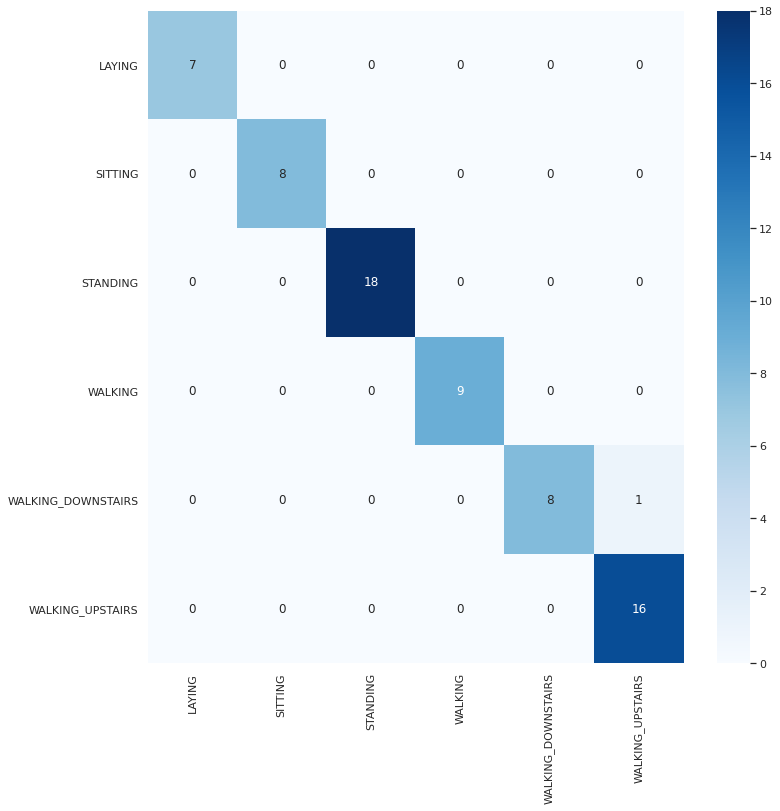

In [ ]:
classes = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, predicted)
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(cf_matrix, annot=True , cmap = 'Blues', xticklabels = classes ,yticklabels= classes  )


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth= 20 , n_estimators = 100 , random_state=42)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(classification_report(y_test , predicted , target_names = classes))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00         7
           SITTING       1.00      1.00      1.00         8
          STANDING       1.00      1.00      1.00        18
           WALKING       1.00      1.00      1.00         9
WALKING_DOWNSTAIRS       0.89      0.89      0.89         9
  WALKING_UPSTAIRS       0.94      0.94      0.94        16

          accuracy                           0.97        67
         macro avg       0.97      0.97      0.97        67
      weighted avg       0.97      0.97      0.97        67



In [ ]:
#ANN

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
classifier=Sequential()

In [ ]:
X_train = pd.DataFrame(X_train)
Xll = X_train[X_train.columns[1:]]

Y_TRAIN = np.zeros((155,6))
for i in range(155):
  Y_TRAIN[i][y_train[i]-1]=1


In [ ]:
classifier.add(Dense(units=7, kernel_initializer='uniform',activation='relu',input_dim=10))
classifier.add(Dropout(0.4))

In [ ]:
#adding the output layer
classifier.add(Dense(units=6, kernel_initializer='uniform',activation='softmax'))

In [ ]:
#compiling the ANN 
classifier.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
#Fitting the ANN to Training set
classifier.fit(X_train,Y_TRAIN,batch_size=5,epochs=1000)

Epoch 1/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2389 - accuracy: 0.9161
Epoch 2/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.3883 - accuracy: 0.8129
Epoch 3/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.2894 - accuracy: 0.8968
Epoch 4/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8387
Epoch 5/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.8258
Epoch 6/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3579 - accuracy: 0.8710
Epoch 7/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.4063 - accuracy: 0.8194
Epoch 8/1000
31/31 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8387
Epoch 9/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.8129
Epoch 10/1000
31/31 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8645

In [ ]:
y_pred=classifier.predict(X_test)
max = 0
t = []

In [ ]:
for i in range(67):
  for j in range(6):
    if y_pred[i][j]>max:
      k = j
      max = y_pred[i][j]
  k+=1
  k%=6
  t.append(k)
  max = 0
x = np.array(t)
x.shape


(67,)

In [ ]:
count = 0
for i in range(67):
  if y_test[i] == x[i]:
    count+=1
#print(count)
accuracy = count/67
accuracy *= 100
accuracy

94.02985074626866